# *★classify iris data by suport vector machine★*

## outline
### 1. load data and confirm the contents of loaded data
### 2. preprocessing for missing and categorical data
### 3. extract features and labels
### 4. preprocessing for scaling
### 5. split features and labels into train and test data
### 6. learning, then make a model by grid search
### 7. show the results of output by test data(confusion matrix)

## 1. load data and confirm contents

In [2]:
# -*- coding: utf-8 -*-
import warnings
warnings.filterwarnings('ignore')
#use iris datasets
from sklearn.datasets import load_iris
import pandas as pd
iris = load_iris()
df_iris_data = pd.DataFrame(iris.data, columns=iris.feature_names)
df_iris_label = pd.Series(iris.target)
print("1. the labels & # of data for each labels")
print(df_iris_label.replace([0,1,2], iris.target_names).value_counts(), "\n")
print("2. the contents of iris features and data (top 5)")
df_iris_data.head()

1. the labels & # of data for each labels
versicolor    50
virginica     50
setosa        50
dtype: int64 

2. the contents of iris features and data (top 5)


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


## 2. preprocessing for missing and categorical data

In [3]:
#this data does not have missing and categorical data, so preprocessing is not conducted in this learning
df_iris_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
sepal length (cm)    150 non-null float64
sepal width (cm)     150 non-null float64
petal length (cm)    150 non-null float64
petal width (cm)     150 non-null float64
dtypes: float64(4)
memory usage: 4.8 KB


## 3. extract features and labels

In [4]:
#this time, let's use third(petal length) and fourth(petal width) data of iris features
x = df_iris_data.loc[:, ["petal length (cm)","petal width (cm)"]]
#x = df_iris_data.iloc[:, [2,3]] #-> same result shown that is extracted from pandas dataframe
#labels are defined as "y"
y = df_iris_label
print("(# of total data, # of features used this time)")
print(x.shape)

(# of total data, # of features used this time)
(150, 2)


## 4. preprocessing for scaling

mean of feature data
1. no scaled : 
petal length (cm)    3.758000
petal width (cm)     1.199333
dtype: float64
2. StandardScaler :  -1.3278354108152521
3. RobustScaler :  -0.11812698412698412


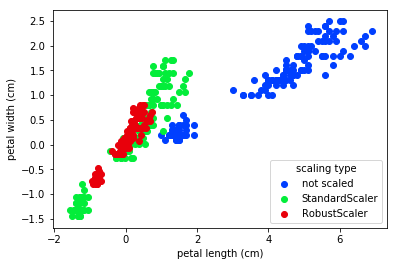

In [5]:
#lest's try 2 types of scaling, StandardScaler, RobustScaler
from sklearn.preprocessing import StandardScaler, RobustScaler
sc = StandardScaler()
x_sc = sc.fit_transform(x)
rc = RobustScaler()
x_rc = rc.fit_transform(x)
print("mean of feature data")
print("1. no scaled : \n{}".format(x.mean()))
print("2. StandardScaler : ", x_sc[0].mean())
print("3. RobustScaler : ", x_rc.mean())

%matplotlib inline
#plot by scatter map
import matplotlib.pyplot as plt
plt.style.use('seaborn-bright')
plt.scatter(x["petal length (cm)"], x["petal width (cm)"], label="not scaled")
plt.scatter(x_sc[:,0], x_sc[:,1], label="StandardScaler")
plt.scatter(x_rc[:,0], x_rc[:,1], label="RobustScaler")
plt.xlabel("petal length (cm)")
plt.ylabel("petal width (cm)")
plt.legend(loc='lower right', title="scaling type")

## 5. split features and labels into train and test data

In [6]:
#train data : 70%, test data : 30% are used
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)
x_train_sc, x_test_sc, y_train_sc, y_test_sc = train_test_split(x_sc, y, test_size=0.3, random_state=1)
x_train_rc, x_test_rc, y_train_rc, y_test_rc = train_test_split(x_rc, y, test_size=0.3, random_state=1)
print("# of data for train and test (no scaling, StandardScaler, RobustScaler -> should be same)")
print("for train",x_train.shape,x_train_sc.shape,x_train_rc.shape, "\nfor test ",x_test.shape,x_test_sc.shape,x_test_rc.shape)

# of data for train and test (no scaling, StandardScaler, RobustScaler -> should be same)
for train (105, 2) (105, 2) (105, 2) 
for test  (45, 2) (45, 2) (45, 2)


## 6. Learning, then make a model by grid search

In [7]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.externals import joblib
param_values = [0.001, 0.05, 0.1, 0.5, 1, 5, 10, 50, 100]
param_grid = {"C": param_values, "gamma": param_values, "kernel":["linear"]}
grid_search_ns = GridSearchCV(SVC(random_state=1), param_grid, cv=5, iid=True)
grid_search_ns.fit(x_train, y_train)
grid_search_sc = GridSearchCV(SVC(random_state=1), param_grid, cv=5, iid=True)
grid_search_sc.fit(x_train_sc, y_train_sc)
grid_search_rc = GridSearchCV(SVC(random_state=1), param_grid, cv=5, iid=True)
grid_search_rc.fit(x_train_rc, y_train_rc)

joblib.dump(grid_search_ns, "iris_SVC_nonScaled.pkl")
joblib.dump(grid_search_sc, "iris_SVC_sc.pkl")
joblib.dump(grid_search_rc, "iris_SVC_rc.pkl")
print("non scaled data")
print('Test set score: {0:.3f}'.format(grid_search_ns.score(x_test, y_test)))
print('Best parameters: {}'.format(grid_search_ns.best_params_))
print('Best cross-validation: {0:.3f}'.format(grid_search_ns.best_score_), "\n")
print("StandardScaler")
print('Test set score: {0:.3f}'.format(grid_search_sc.score(x_test_sc, y_test_sc)))
print('Best parameters: {}'.format(grid_search_sc.best_params_))
print('Best cross-validation: {0:.3f}'.format(grid_search_sc.best_score_), "\n")
print("RobustScaler")
print('Test set score: {0:.3f}'.format(grid_search_rc.score(x_test_rc, y_test_rc)))
print('Best parameters: {}'.format(grid_search_rc.best_params_))
print('Best cross-validation: {0:.3f}'.format(grid_search_rc.best_score_), "\n")

non scaled data
Test set score: 0.978
Best parameters: {'C': 0.05, 'gamma': 0.001, 'kernel': 'linear'}
Best cross-validation: 0.971 

StandardScaler
Test set score: 0.956
Best parameters: {'C': 0.1, 'gamma': 0.001, 'kernel': 'linear'}
Best cross-validation: 0.962 

RobustScaler
Test set score: 0.956
Best parameters: {'C': 0.5, 'gamma': 0.001, 'kernel': 'linear'}
Best cross-validation: 0.962 



## 7. show the results of output by test data(confusion matrix)

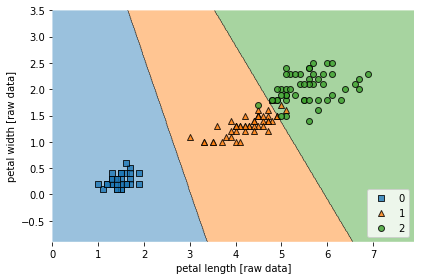

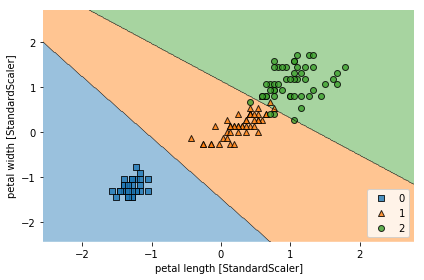

In [9]:
from mlxtend.plotting import plot_decision_regions
import numpy as np
#combine the train and test data
x_combined_ns = np.vstack((x_train, x_test))
x_combined_sc = np.vstack((x_train_sc, x_test_sc))
y_combined = np.hstack((y_train_sc, y_test_sc))

#plot classification from raw data
plot_decision_regions(x_combined_ns, y_combined, clf=grid_search_ns, res=0.02)
plt.xlabel('petal length [raw data]')
plt.ylabel('petal width [raw data]')
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()

#plot classification from RobustScaled data
plot_decision_regions(x_combined_sc, y_combined, clf=grid_search_sc,  res=0.02)
plt.xlabel('petal length [StandardScaler]')
plt.ylabel('petal width [StandardScaler]')
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()

confusion matrix by SVM (non scaled)


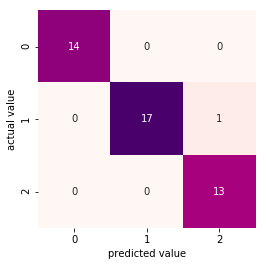

confusion matrix by SVM (StandardScaler)


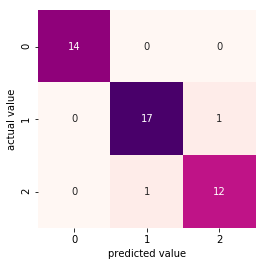

In [10]:
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix
import seaborn as sns
print("confusion matrix by SVM (non scaled)")
y_pred_SVM_ns = grid_search_ns.predict(x_test)
mat_SVM_ns = confusion_matrix(y_test, y_pred_SVM_ns)
sns.heatmap(mat_SVM_ns, square=True, annot=True, cbar=False, fmt="d", cmap="RdPu")
plt.xlabel("predicted value")
plt.ylabel("actual value")
plt.show()

print("confusion matrix by SVM (StandardScaler)")
y_pred_SVM_sc = grid_search_sc.predict(x_test_sc)
mat_SVM_sc = confusion_matrix(y_test_sc, y_pred_SVM_sc)
sns.heatmap(mat_SVM_sc, square=True, annot=True, cbar=False, fmt="d", cmap="RdPu")
plt.xlabel("predicted value")
plt.ylabel("actual value")
plt.show()